# Keep-it-dry! Model: XGBoost (Quick Submission)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

## Read Data

Dataset selections (based on KNN Performance for time efficiency):
1. kid_train_ii_mm_smotenc_1.csv
2. kid_train_ii_mm_smote_1.csv
3. kid_train_ki_mm_smotenc_1.csv
4. kid_train_ki_mm_smote.csv

In [7]:
datasets_dict = {}

datasets_dict['ii_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_adasyn.csv', index_col=0)
datasets_dict['ii_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_ros.csv', index_col=0)
datasets_dict['ii_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_rus.csv', index_col=0)
datasets_dict['ii_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smote.csv', index_col=0)
datasets_dict['ii_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_mm_smotenc_1.csv', index_col=0)

datasets_dict['ii_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_adasyn.csv', index_col=0)
datasets_dict['ii_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_ros.csv', index_col=0)
datasets_dict['ii_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_rus.csv', index_col=0)
datasets_dict['ii_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smote.csv', index_col=0)
datasets_dict['ii_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_ro_smotenc_1.csv', index_col=0)

datasets_dict['ii_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_adasyn.csv', index_col=0)
datasets_dict['ii_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_ros.csv', index_col=0)
datasets_dict['ii_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_rus.csv', index_col=0)
datasets_dict['ii_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smote.csv', index_col=0)
datasets_dict['ii_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ii_st_smotenc_1.csv', index_col=0)

datasets_dict['ki_mm_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_adasyn.csv', index_col=0)
datasets_dict['ki_mm_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_ros.csv', index_col=0)
datasets_dict['ki_mm_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_rus.csv', index_col=0)
datasets_dict['ki_mm_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smote.csv', index_col=0)
datasets_dict['ki_mm_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_mm_smotenc_1.csv', index_col=0)

datasets_dict['ki_ro_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_adasyn.csv', index_col=0)
datasets_dict['ki_ro_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_ros.csv', index_col=0)
datasets_dict['ki_ro_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_rus.csv', index_col=0)
datasets_dict['ki_ro_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smote.csv', index_col=0)
datasets_dict['ki_ro_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_ro_smotenc_1.csv', index_col=0)

datasets_dict['ki_st_adasyn'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_adasyn.csv', index_col=0)
datasets_dict['ki_st_ros'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_ros.csv', index_col=0)
datasets_dict['ki_st_rus'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_rus.csv', index_col=0)
datasets_dict['ki_st_smote'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smote.csv', index_col=0)
datasets_dict['ki_st_smotenc_1'] = pd.read_csv('./../Preprocessing/kid_train_ki_st_smotenc_1.csv', index_col=0)

## Dataset Selection

In [8]:
dataset_result = {}
dataset_result['dataset'] = []
dataset_result['training_accuracy'] = []
dataset_result['testing_accuracy'] = []
dataset_result['testing_f1_score'] = []

for title, data in datasets_dict.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=.2, stratify=y_df, random_state=42)
    
    xgb_clf_dataset = XGBClassifier(objective='binary:logistic', random_state=42)
    xgb_clf_dataset.fit(X_train, y_train)
    
    y_predict = xgb_clf_dataset.predict(X_val)

    dataset_result['dataset'].append(title)
    dataset_result['training_accuracy'].append(xgb_clf_dataset.score(X_train, y_train))
    dataset_result['testing_accuracy'].append(xgb_clf_dataset.score(X_val, y_val))
    dataset_result['testing_f1_score'].append(f1_score(y_val, y_predict))

In [9]:
df_result = pd.DataFrame(dataset_result)
df_result_sorted = df_result.sort_values(by='testing_f1_score', ascending=False)

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

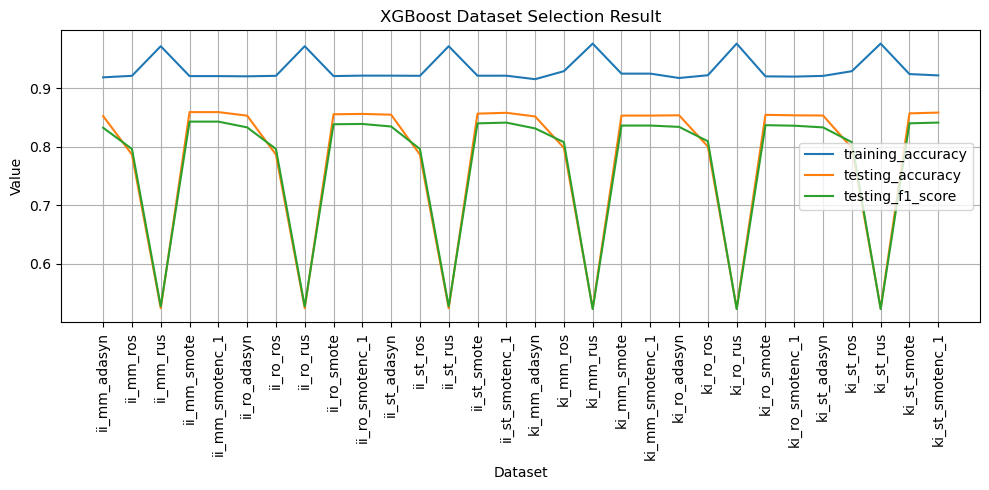

In [11]:
plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("XGBoost Dataset Selection Result")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RAYHAN EGAR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

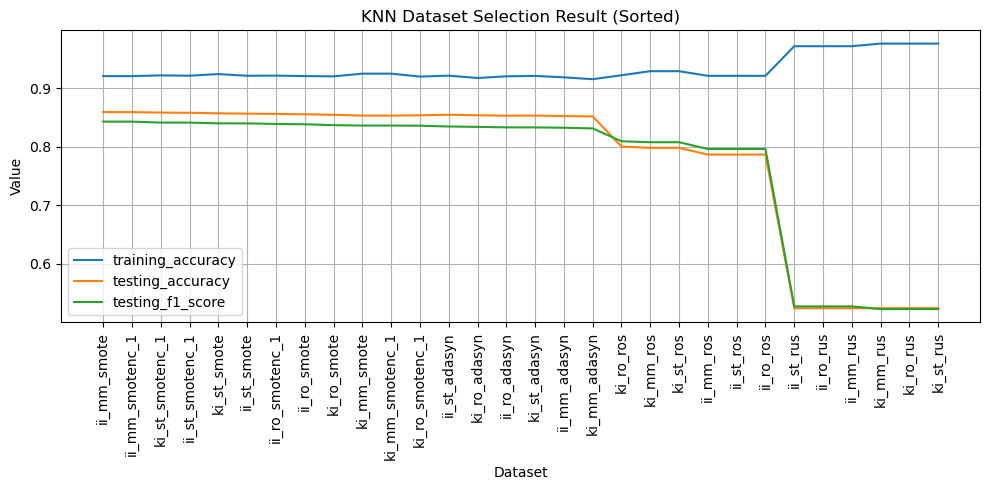

In [13]:
plt.figure(figsize=[10, 5])

sns.lineplot(data=df_result_sorted, x='dataset', y='training_accuracy', label='training_accuracy').grid(True)
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_accuracy', label='testing_accuracy')
sns.lineplot(data=df_result_sorted, x='dataset', y='testing_f1_score', label='testing_f1_score')

plt.title("KNN Dataset Selection Result (Sorted)")
plt.ylabel("Value")
plt.xlabel("Dataset")
plt.xticks(rotation=90)

plt.tight_layout()
plt.legend()
plt.show()

In [14]:
df_result_sorted.head(10)

,dataset,training_accuracy,testing_accuracy,testing_f1_score
3,ii_mm_smote,0.920712,0.859242,0.842975
4,ii_mm_smotenc_1,0.920712,0.859242,0.842975
29,ki_st_smotenc_1,0.921937,0.858406,0.841344
14,ii_st_smotenc_1,0.921399,0.858048,0.841304
28,ki_st_smote,0.924178,0.857092,0.840064
13,ii_st_smote,0.921340,0.856614,0.840000
9,ii_ro_smotenc_1,0.921519,0.856136,0.838994
8,ii_ro_smote,0.920772,0.855538,0.838477
23,ki_ro_smote,0.920264,0.854582,0.836929
18,ki_mm_smote,0.924925,0.853268,0.836267


### Dataset selection result

Based on F1-Score
1. ii_mm_smote
2. ii_mm_smotenc_1
3. ki_st_smotenc_1

Backups
1. ki_ro_ros
2. ki_mm_ros
3. ki_st_ros

## Training

In [18]:
training_datasets = {}
training_datasets['ii_mm_smote'] = datasets_dict['ii_mm_smote']
training_datasets['ii_mm_smotenc_1'] = datasets_dict['ii_mm_smotenc_1']
training_datasets['ki_st_smotenc_1'] = datasets_dict['ki_st_smotenc_1']
training_datasets['ki_ro_ros'] = datasets_dict['ki_ro_ros']
training_datasets['ki_mm_ros'] = datasets_dict['ki_mm_ros']
training_datasets['ki_st_ros'] = datasets_dict['ki_st_ros']


In [35]:
xgb_grid = {}
xgb_grid['title'] = []
xgb_grid['f1_score'] = []
xgb_grid['parameters'] = []
best_model = {}

# Define hyperparameter grid for tuning
param_grid = {
    'learning_rate': [.001, .01, .1, .3, .5],
    'max_depth': [3, 5, 8],
    'n_estimators': [50, 100, 200]
}

# Loop through each selected dataset
for title, data in training_datasets.items():

    X_df = data.copy()
    y_df = X_df.pop('failure')
    object_cols = X_df.select_dtypes(include=['object']).columns
    X_df = X_df.drop(object_cols, axis=1)
    
    # Create KNN classifier and GridSearchCV object
    xgb_clf = XGBClassifier(objective='binary:logistic', random_state=42)
    grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=2, scoring='f1_macro')  # Adjust cv and scoring if needed

    # Fit the GridSearchCV object to the current dataset
    grid_search.fit(X_df, y_df)

    # Print results (best parameters and best score)
    print(f"Dataset: {title}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best F1 Score: {grid_search.best_score_}")

    xgb_grid['title'].append(title)
    xgb_grid['parameters'].append(grid_search.best_params_)
    xgb_grid['f1_score'].append(grid_search.best_score_)

    # Access the best model for further use (optional)
    best_model[title] = grid_search.best_estimator_



Dataset: ii_mm_smote
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
Best F1 Score: 0.4555928621629741
Dataset: ii_mm_smotenc_1
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
Best F1 Score: 0.4555928621629741
Dataset: ki_st_smotenc_1
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 200}
Best F1 Score: 0.45562609044293345
Dataset: ki_ro_ros
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 200}
Best F1 Score: 0.4880885965248709
Dataset: ki_mm_ros
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 200}
Best F1 Score: 0.4880885965248709
Dataset: ki_st_ros
Best Hyperparameters: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 200}
Best F1 Score: 0.4880885965248709


With the above conditions, we'll try to go with all of them:

1. ii_mm_smote (test: kid_test_ii_mm.csv)
2. ii_mm_smotenc_1 (test: kid_test_ii_mm.csv)
3. ki_st_smotenc_1 (test: kid_test_ki_st.csv)
4. ki_ro_ros (test: kid_test_ki_ro.csv)
5. ki_mm_ros (test: kid_test_ki_mm.csv)
6. ki_st_ros (test: kid_test_ki_st.csv)

## Prediction

In [36]:
df_ii_mm_smote_test = pd.read_csv('./../Preprocessing/kid_test_ii_mm.csv', index_col=0)
df_ii_mm_smotenc_test = pd.read_csv('./../Preprocessing/kid_test_ii_mm.csv', index_col=0)
df_ki_st_smotenc_test = pd.read_csv('./../Preprocessing/kid_test_ki_st.csv', index_col=0)
df_ki_ro_ros_test = pd.read_csv('./../Preprocessing/kid_test_ki_ro.csv', index_col=0)
df_ki_mm_ros_test = pd.read_csv('./../Preprocessing/kid_test_ki_mm.csv', index_col=0)
df_ki_st_ros_test = pd.read_csv('./../Preprocessing/kid_test_ki_st.csv', index_col=0)

In [37]:
id = df_ii_mm_smote_test[['id']].copy()

In [38]:
to_drop = df_ii_mm_smote_test.select_dtypes(include=['object']).columns

X_ii_mm_smote_test = df_ii_mm_smote_test.copy().drop(to_drop, axis=1)
X_ii_mm_smotenc_test = df_ii_mm_smotenc_test.copy().drop(to_drop, axis=1)
X_ki_st_smotenc_test = df_ki_st_smotenc_test.copy().drop(to_drop, axis=1)
X_ki_ro_ros_test = df_ki_ro_ros_test.copy().drop(to_drop, axis=1)
X_ki_mm_ros_test = df_ki_mm_ros_test.copy().drop(to_drop, axis=1)
X_ki_st_ros_test = df_ki_st_ros_test.copy().drop(to_drop, axis=1)

X_ii_mm_smote_test.head()

,id,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,product_code_F,product_code_G,product_code_H,product_code_I
0,26570,0.244996,5.0,6.0,6,4,0.206897,0.310345,0.250000,0.708671,...,0.688620,0.234205,0.583833,0.370388,0.556451,0.392314,1.0,0.0,0.0,0.0
1,26571,0.227814,5.0,6.0,6,4,0.379310,0.275862,0.000000,0.519851,...,0.584667,0.556373,0.574945,0.452963,0.305774,0.304882,1.0,0.0,0.0,0.0
2,26572,0.223986,5.0,6.0,6,4,0.275862,0.413793,0.166667,0.598460,...,0.459347,0.209169,0.501178,0.635761,0.439102,0.414162,1.0,0.0,0.0,0.0
3,26573,0.225574,5.0,6.0,6,4,0.275862,0.379310,0.416667,0.338600,...,0.461428,0.390003,0.495860,0.280786,0.445355,0.356193,1.0,0.0,0.0,0.0
4,26574,0.495719,5.0,6.0,6,4,0.482759,0.551724,0.333333,0.509892,...,0.542093,0.438129,0.535060,0.337007,0.517543,0.541446,1.0,0.0,0.0,0.0


In [39]:
# Drop one-hot label and ID
to_drop_again = ['id', 'product_code_F', 'product_code_G', 'product_code_H', 'product_code_I']
X_ii_mm_smote_test.drop(to_drop_again, axis=1, inplace=True)
X_ii_mm_smotenc_test.drop(to_drop_again, axis=1, inplace=True)
X_ki_st_smotenc_test.drop(to_drop_again, axis=1, inplace=True)
X_ki_ro_ros_test.drop(to_drop_again, axis=1, inplace=True)
X_ki_mm_ros_test.drop(to_drop_again, axis=1, inplace=True)
X_ki_st_ros_test.drop(to_drop_again, axis=1, inplace=True)

In [40]:
X_ii_mm_smote_test.head()

,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,0.244996,5.0,6.0,6,4,0.206897,0.310345,0.250000,0.708671,0.256017,...,0.400116,0.367354,0.500608,0.425601,0.688620,0.234205,0.583833,0.370388,0.556451,0.392314
1,0.227814,5.0,6.0,6,4,0.379310,0.275862,0.000000,0.519851,0.462364,...,0.483236,0.496338,0.355351,0.415174,0.584667,0.556373,0.574945,0.452963,0.305774,0.304882
2,0.223986,5.0,6.0,6,4,0.275862,0.413793,0.166667,0.598460,0.291765,...,0.297672,0.466032,0.587033,0.426815,0.459347,0.209169,0.501178,0.635761,0.439102,0.414162
3,0.225574,5.0,6.0,6,4,0.275862,0.379310,0.416667,0.338600,0.339783,...,0.434342,0.470961,0.672089,0.280901,0.461428,0.390003,0.495860,0.280786,0.445355,0.356193
4,0.495719,5.0,6.0,6,4,0.482759,0.551724,0.333333,0.509892,0.552737,...,0.456810,0.531783,0.399438,0.408832,0.542093,0.438129,0.535060,0.337007,0.517543,0.541446


### Obtain Model

In [41]:
#ii_mm_smote, ii_mm_smotenc_1, ki_st_smotenc_1, ki_ro_ros, ki_mm_ros, ki_st_ros

xgb_clf_ii_mm_smote = best_model['ii_mm_smote']
xgb_clf_ii_mm_smotenc_1 = best_model['ii_mm_smotenc_1']
xgb_clf_ki_st_smotenc_1 = best_model['ki_st_smotenc_1']
xgb_clf_ki_ro_ros = best_model['ki_ro_ros']
xgb_clf_ki_mm_ros = best_model['ki_mm_ros']
xgb_clf_ki_st_ros = best_model['ki_st_ros']


In [42]:
def predict_xgb(xgb_model, test_data, file_name, target_column_name='failure', row_id_df=id):
    y_pred = xgb_model.predict(test_data)
    df_y_pred = pd.DataFrame(y_pred, columns=[target_column_name])
    df_submission = pd.concat([row_id_df, df_y_pred], axis=1)
    df_submission.to_csv(f'{file_name}.csv', index=False)

### Submission

In [43]:
predict_xgb(xgb_clf_ii_mm_smote, X_ii_mm_smote_test, 'xgb_ii_mm_smote_quickv2')
predict_xgb(xgb_clf_ii_mm_smotenc_1, X_ii_mm_smotenc_test, 'xgb_ii_mm_smotenc_1_quickv2')
predict_xgb(xgb_clf_ki_st_smotenc_1, X_ii_mm_smotenc_test, 'xgb_ki_st_smotenc_1_quickv2')
predict_xgb(xgb_clf_ki_ro_ros, X_ki_ro_ros_test, 'xgb_ki_ro_ros_quickv2')
predict_xgb(xgb_clf_ki_mm_ros, X_ki_mm_ros_test, 'xgb_ki_mm_ros_quickv2')
predict_xgb(xgb_clf_ki_st_ros, X_ki_st_ros_test, 'xgb_ki_st_ros_quickv2')


## Submission (Asal)

In [45]:
# ii_mm_smote

X_df_asal = training_datasets['ii_mm_smote'].copy()
y_df_asal = X_df_asal.pop('failure')
object_cols = X_df.select_dtypes(include=['object']).columns
X_df = X_df.drop(object_cols, axis=1)

xgb_clf_asal = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf_asal.fit(X_df_asal, y_df_asal)

predict_xgb(xgb_clf_asal, X_ii_mm_smote_test, 'xgb_ii_mm_smote_quick_asal')